# Determinant formula from Cavalieri's principle

In [18]:
# setup SymPy
from sympy import *
init_printing()
Vector = Matrix

# setup plotting
%matplotlib inline
import matplotlib.pyplot as mpl
from util.plot_helpers import plot_vec, plot_vecs, plot_line, plot_plane, autoscale_arrows

## Two dimentions

In [5]:
a, b, c, d = symbols('a b  c d')

# Consider the volume of the parallelegram with sides:
u1 = Vector([a,b])
u2 = Vector([c,d])

# We can compute the volume of the parallelpiped by computing the deteminant of
A = Matrix([[a,b],
            [c,d]])
A.det()

###  Cavalieri's principle

![Cavalieri's principle](http://mathaware.org/mam/00/master/essays/dimension/JPG/figure10.jpg)

Mathematically, we have 

$$
  D(\vec{u}_1, \  \vec{u}_2)
  = 
  D(\vec{u}_1 - \alpha \vec{u}_2, \ \vec{u}_2).
$$

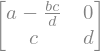

In [6]:
# choose alpha so A's top right entry will be zero
alpha = symbols('alpha')

alpha = b/d
A[0,:] = A[0,:] - alpha*A[1,:]
A

Copmputing the area is the same as computing the product of the entries on the diagonal:

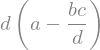

In [7]:
A[0,0]*A[1,1]

In [8]:
simplify( A[0,0]*A[1,1] )

**Intuition:** the coefficient $\alpha$ encodes something very important about the "alternating multi-linear" structure that deteminants and cross products embody. In words, the choice of $\alpha$ and the resulting expression $a-\frac{bc}{d}$ correponds to what happens to the first component of $\vec{u}_1$ when we make it's second component zero.

(Yeah, I know, handwavy like crazy, but better than nothing.)

## Three dimentions

In [9]:
a,b,c, d,e,f, g,h,i = symbols('a b c  d e f  g h i')

# Consider the volume of the parellelpiped with sides:
u1 = Vector([a,b,c])
u2 = Vector([d,e,f])
u3 = Vector([g,h,i])

# We can compute the volume of the parallelpiped by computing the deteminant of
A = Matrix([[a,b,c],
            [d,e,f],
            [g,h,i]])
A.det()

###  Cavalieri's principle

![Cavalieri's principle](http://mathaware.org/mam/00/master/essays/dimension/JPG/figure10.jpg)


This principle leads to the following property of the determinant

$$
  D(\vec{u}_1, \ \vec{u}_2, \ \vec{u}_3)
  = 
  D(\vec{u}_1,  \ \vec{u}_2- k \vec{u}_3, \ \vec{u}_3)
  =
  D(\vec{u}_1 -\ell\vec{u}_2 - m\vec{u}_3  , \  \vec{u}_2-k \vec{u}_3, \ \vec{u}_3).
$$

In particuler we make the following particular choice for the cofficients

$$
  D(\vec{u}_1, \vec{u}_2, \vec{u}_3)
  = 
  D(\vec{u}_1 - \beta \vec{u}_3 - \gamma(\vec{u}_2 - \alpha\vec{u}_3), \  \vec{u}_2 - \alpha\vec{u}_3, \ \vec{u}_3).
$$

Choosing the right coefficients $\alpha$, $\beta$, and $\gamma$ can transform the matrix $A$ into a lower triangular form, which will make computing the determinant easier.

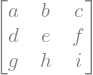

In [10]:
alpha, beta, gamma = symbols('alpha beta gamma')

A

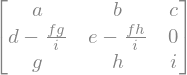

In [11]:
# first get rid of f by subtracting third row from second row
alpha = f/i
A[1,:]= A[1,:] - alpha*A[2,:]
A

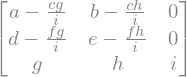

In [12]:
# second get rid of c by subtracting third row from first row
beta = c/i
A[0,:]= A[0,:] - beta*A[2,:]
A

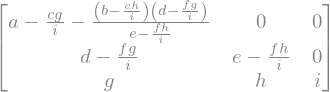

In [13]:
# third get rid of b-ch/i by subtracting second row from first row
gamma = A[0,1]/A[1,1]
A[0,:]= A[0,:] - gamma*A[1,:]
A

Stargting from the first row, the volume of the determinant is proporitonal to the coeffieicnt `A[0,0]`. The are of the parallelepiped formd by the first two rows is `A[0,0]*A[1,1]` (we can ignore `A[1,0]`) and the overall volume is


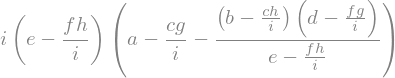

In [14]:
A[0,0]*A[1,1]*A[2,2]

In [15]:
simplify( A[0,0]*A[1,1]*A[2,2] )

In [16]:
# I still don't know how to motivate the recusive formula except to say it turns out that way...

# I tried to think about decomposing the problem into subparts,
#  but i cannot motivate det(Ai + Aj + Ak) != det(Ai) + det(Aj) + det(Ak)
#  where Ai is the same as A but with A[0,1] and A[0,2] set to zero.


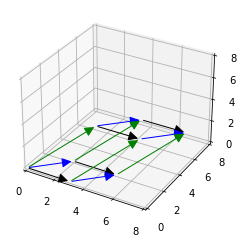

In [17]:
u1 = Vector([3,0,0])
u2 = Vector([2,2,0])
u3 = Vector([3,3,3])

plot_vecs(u1,u2,u3)
plot_vec(u1, at=u2, color='k')
plot_vec(u2, at=u1, color='b')
plot_vec(u1, at=u2+u3, color='k')
plot_vec(u2, at=u1+u3, color='b')
plot_vec(u1, at=u3, color='k')
plot_vec(u2, at=u3, color='b')
plot_vec(u3, at=u1, color='g')
plot_vec(u3, at=u2, color='g')
plot_vec(u3, at=u1+u2, color='g')

autoscale_arrows()

## Links

Nice visuazation of axis-aligned volume computation:  
https://arxiv.org/pdf/2301.06586.pdf#page=12